# Libraries import, Load dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import lightgbm as lgb


np.random.seed(0)
random.seed(0)

plt.style.use('seaborn-whitegrid')

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [2]:
x = pd.read_csv('./data/train.csv')
x_test = pd.read_csv('./data/test.csv')

print(x.SalePrice.isnull().sum())

#x.dropna(axis=0, subset=['SalePrice'], inplace=True)
#y = x.SalePrice #or x['SalePrice']

0


# EDA

In [3]:
# print(x.head(5))
# x['MSZoning'].value_counts()
print(x_test.columns)
missing_value = [col for col in x_test.columns if x_test[col].isnull().sum() != 0]
print(missing_value)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# LabelEncoder 사용하기 위해 train, test 병합
all = pd.concat([x, x_test], sort=False).reset_index(drop=True)

In [5]:
all.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [6]:
num_cal = [col for col in all.columns if all[col].dtypes == 'int64' and 'float64']
# OHE cardinality <10 and object
cat_cal = [col for col in all.columns if all[col].dtypes == 'object']
#cat_cal = [col for col in all.columns if all[col].dtypes == 'object' and all[col].nunique() < 10]

In [7]:
le = LabelEncoder()
for cat in cat_cal:
    print(cat)
    all[cat].fillna("missing",inplace=True)
    le = le.fit(all[cat])
    all[cat] = le.transform(all[cat])
    all[cat] = all[cat].astype("category")  #object > category

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [8]:
all.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice         float64
Length: 81, dtype: object

In [9]:
x_le = all[~all['SalePrice'].isnull()]
test_le = all[all['SalePrice'].isnull()]
x_train = x_le.drop(["Id","SalePrice"], axis=1)
y_train = x_le.SalePrice

In [10]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,...,6,0,5,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,...,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,...,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,...,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,...,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,3,4,4,0,12,2008,8,4


In [19]:
folds = 5
kf = KFold(n_splits=folds)

lgbm_params = {
    "objective":"regression", "random_seed":0
}

In [20]:
models = []
rmses = []
oof = np.zeros(len(x_train))

for train_idx, val_idx in kf.split(x_train):
    X_train = x_train.iloc[train_idx]
    X_valid = x_train.iloc[val_idx]
    Y_train = y_train.iloc[train_idx]
    Y_valid = y_train.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train,Y_train)    
    lgb_valid = lgb.Dataset(X_valid,Y_valid)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_valid,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10) 
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration) #predict_disable_shape_check=True
    tmp_rmse = np.sqrt(mean_squared_error(np.log(Y_valid),np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3133
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 180717.091610
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.383e+09
[20]	valid_0's l2: 7.23859e+08
[30]	valid_0's l2: 5.8266e+08
[40]	valid_0's l2: 5.52343e+08
[50]	valid_0's l2: 5.46509e+08
[60]	valid_0's l2: 5.51945e+08
[70]	valid_0's l2: 5.56598e+08
Early stopping, best iteration is:
[56]	valid_0's l2: 5.43228e+08
0.11754696689890133
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001640 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76

C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Info] Start training from score 180407.575342
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.59763e+09
[20]	valid_0's l2: 9.59527e+08
[30]	valid_0's l2: 8.90924e+08
[40]	valid_0's l2: 9.11547e+08
[50]	valid_0's l2: 9.3911e+08
Early stopping, best iteration is:
[34]	valid_0's l2: 8.8408e+08
0.1507944955590781


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001610 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3143
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 75
[LightGBM] [Info] Start training from score 180007.375000
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.50794e+09
[20]	valid_0's l2: 1.38566e+09
[30]	valid_0's l2: 1.08594e+09
[40]	valid_0's l2: 9.55363e+08
[50]	valid_0's l2: 9.02114e+08
[60]	valid_0's l2: 8.72905e+08
[70]	valid_0's l2: 8.54314e+08
[80]	valid_0's l2: 8.34916e+08
[90]	valid_0's l2: 8.28906e+08
[100]	valid_0's l2: 8.35134e+08
Did not meet early stopping. Best iteration is:
[91]	valid_0's l2: 8.26352e+08
0.13331954902113527
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001734 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Info] Total Bins 3169
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 75
[LightGBM] [Info] Start training from score 182883.660103
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 1.34544e+09
[20]	valid_0's l2: 6.79458e+08
[30]	valid_0's l2: 5.26596e+08
[40]	valid_0's l2: 4.78262e+08
[50]	valid_0's l2: 4.8615e+08
[60]	valid_0's l2: 4.81345e+08
Early stopping, best iteration is:
[44]	valid_0's l2: 4.77433e+08
0.1277956557521
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76
[LightGBM] [Info] Start training from score 180590.277397
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 2.13477e+09
[20]	valid_0's l2: 1.27774e+09
[30]	valid_0's l

C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages


[40]	valid_0's l2: 1.05489e+09
[50]	valid_0's l2: 1.02958e+09
[60]	valid_0's l2: 1.0395e+09
[70]	valid_0's l2: 1.03637e+09
Early stopping, best iteration is:
[50]	valid_0's l2: 1.02958e+09
0.14189291659113656


In [21]:
print(sum(rmses)/len(rmses))

0.13426991676447025

In [91]:
actual_pred_df = pd.DataFrame({
    "actual" : y_train,
    "pred" : oof
})

<AxesSubplot:>

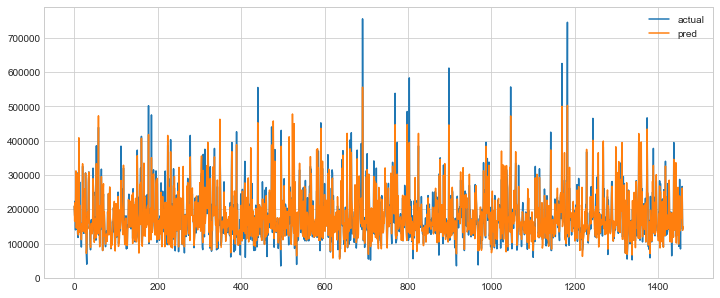

In [93]:
actual_pred_df.plot(figsize=(12,5))

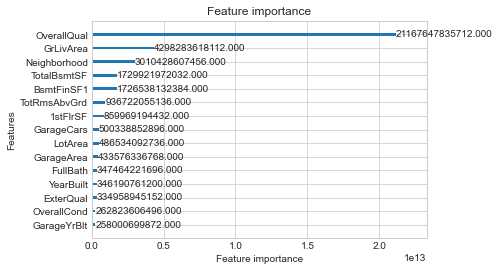

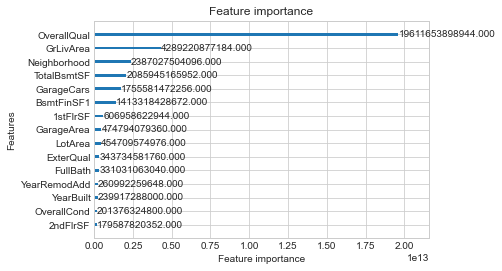

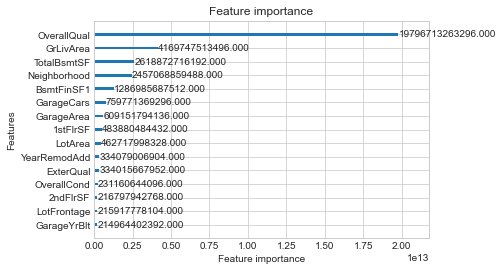

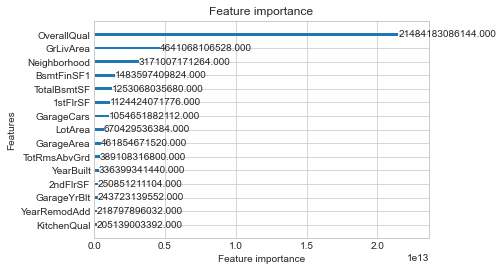

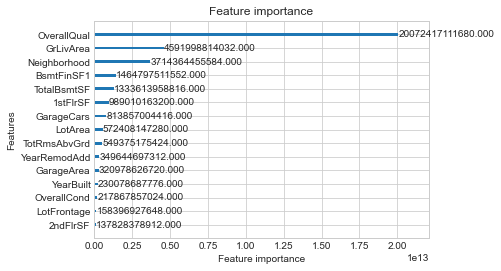

In [94]:
for model in models:
    lgb.plot_importance(model, importance_type="gain", max_num_features=15)

In [110]:
# y SalePrice Log
x_le = all[~all['SalePrice'].isnull()]
test_le = all[all['SalePrice'].isnull()]
x_train = x_le.drop(["Id","SalePrice"], axis=1)
y_train = x_le.SalePrice
y_train = np.log(y_train)
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [111]:
models = []
rmses = []
oof = np.zeros(len(x_train))

for train_idx, val_idx in kf.split(x_train):
    X_train = x_train.iloc[train_idx]
    X_valid = x_train.iloc[val_idx]
    Y_train = y_train.iloc[train_idx]
    Y_valid = y_train.iloc[val_idx]
    
    lgb_train = lgb.Dataset(X_train,Y_train)    
    lgb_valid = lgb.Dataset(X_valid,Y_valid)
    
    model_lgb = lgb.train(lgbm_params,
                          lgb_train,
                          valid_sets=lgb_valid,
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10) 
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration) #predict_disable_shape_check=True
    tmp_rmse = np.sqrt(mean_squared_error(np.log(Y_valid),np.log(y_pred)))
    print(tmp_rmse)
    
    models.append(model_lgb)
    rmses.append(tmp_rmse)
    oof[val_idx] = y_pred

C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3133
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 74
[LightGBM] [Info] Start training from score 12.021402
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0390269
[20]	valid_0's l2: 0.019755
[30]	valid_0's l2: 0.0159592
[40]	valid_0's l2: 0.0150954
[50]	valid_0's l2: 0.0148001
[60]	valid_0's l2: 0.0147263
[70]	valid_0's l2: 0.0147463
[80]	valid_0's l2: 0.0148361
Early stopping, best iteration is:
[63]	valid_0's l2: 0.0146792
0.010197907548912111
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76
[LightGBM] [Info] Start training from score 12.023281
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0490115
[20]	valid_0's l2: 0.0269084
[30]	valid_0's l2: 0.0218761
[40]	valid_0's l2: 0.0208586
[50]	valid_0's l2: 0.0204315
[60]	valid_0's l2: 0.0202466
[70]	valid_0's l2: 0.0202084
[80]	valid_0's l2: 0.0200962
[90]	valid_0's l2: 0.0201512
[100]	valid_0's l2: 0.0202895
Did not meet early stopping. Best iteration is:
[82]	valid_0's l2: 0.0200752
0.012053277288422353
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001613 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Info] Total Bins 3143
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 75
[LightGBM] [Info] Start training from score 12.020730
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.048983
[20]	valid_0's l2: 0.0261383
[30]	valid_0's l2: 0.0206972
[40]	valid_0's l2: 0.0188576
[50]	valid_0's l2: 0.0181525
[60]	valid_0's l2: 0.0179034
[70]	valid_0's l2: 0.0177823
[80]	valid_0's l2: 0.0178987
[90]	valid_0's l2: 0.0179688
Early stopping, best iteration is:
[71]	valid_0's l2: 0.0177228
0.011149420139674961


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3169
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 75
[LightGBM] [Info] Start training from score 12.032950
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0381256
[20]	valid_0's l2: 0.0194513
[30]	valid_0's l2: 0.0157824
[40]	valid_0's l2: 0.0144094
[50]	valid_0's l2: 0.0139871
[60]	valid_0's l2: 0.0139149
[70]	valid_0's l2: 0.0139959
Early stopping, best iteration is:
[58]	valid_0's l2: 0.0138648
0.010103767887751018
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001527 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3151
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 76


C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\evfrn\anaconda3\envs\kaggle\lib\site-packages

[LightGBM] [Info] Start training from score 12.021891
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.0407477
[20]	valid_0's l2: 0.0220848
[30]	valid_0's l2: 0.019075
[40]	valid_0's l2: 0.0181122
[50]	valid_0's l2: 0.017832
[60]	valid_0's l2: 0.0177373
[70]	valid_0's l2: 0.0177167
[80]	valid_0's l2: 0.0176597
[90]	valid_0's l2: 0.0175451
[100]	valid_0's l2: 0.0174149
Did not meet early stopping. Best iteration is:
[99]	valid_0's l2: 0.0173938
0.01097470832579005


# 결측치 확인

In [106]:
sum(rmses)/len(rmses)

0.010895816238110098

In [22]:
check_df = pd.concat([x, x_test], sort=False).reset_index(drop=True)

In [24]:
print(cat_cal)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [28]:
check_df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
dtype: int64

In [39]:
garage_df = check_df[["GarageFinish"]]
del garage_df

<AxesSubplot:ylabel='Frequency'>

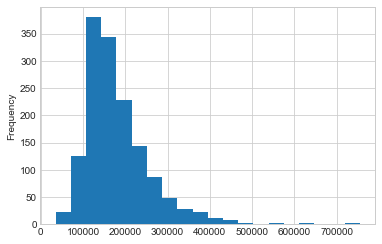

In [37]:
check_df['SalePrice'].plot.hist(bins=20)

In [66]:
check_df["Alley"].value_counts()
print(check_df["Alley"].isnull().sum())
print(len(check_df[check_df["Alley"].isnull()]))

2721
2721


In [68]:
high_facility_col = ['Alley','PoolQC','MiscFeature']

for col in high_facility_col:
    if check_df[col].dtype == 'object':
        if check_df[col].isnull().sum() > 0:
            check_df.loc[~check_df[col].isnull(), col] = 1
            check_df.loc[check_df[col].isnull(), col] = 0

In [80]:
check_df[['Alley', 'MiscFeature', 'PoolQC']].sort_values(ascending=False, by='Alley')

,Alley,MiscFeature,PoolQC
1837,1,0,0
264,1,0,0
2713,1,0,0
217,1,0,0
2712,1,0,0
...,...,...,...
1008,0,0,0
1009,0,0,0
1010,0,0,0
1011,0,0,0


In [85]:
check_df["facilityCount"] = check_df['Alley'] + check_df['MiscFeature'] + check_df['PoolQC']
check_df.drop(['Alley','MiscFeature','PoolQC'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,facilityCount
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,0,2,2008,WD,Normal,208500.0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500.0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,0,9,2008,WD,Normal,223500.0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,0,2,2006,WD,Abnorml,140000.0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,0,12,2008,WD,Normal,250000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,...,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,0,6,2006,WD,Normal,NaN,0
2915,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,...,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,0,4,2006,WD,Abnorml,NaN,0
2916,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,...,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,0,9,2006,WD,Abnorml,NaN,0
2917,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,...,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,MnPrv,700,7,2006,WD,Normal,NaN,1


In [86]:
check_df['facilityCount'].value_counts()

0    2615
1     295
2       9
Name: facilityCount, dtype: int64

In [88]:
check_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [89]:
# 통계량 확인 
check_df.describe().T # 열/행 변환

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [116]:
# 비례척도가 아닌 데이터 삭제
train_df_num = check_df.select_dtypes(include=[np.number])
nonratio_features = ['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MoSold','YrSold']
num_features = sorted(list(set(train_df_num) - set(nonratio_features)))
num_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'SalePrice',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [ ]:
for col in num_features:
    if train_num